In [638]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
housing_data = pd.read_csv("./data/kc_house_data.csv", dtype={'sqft_living': np.float32, 'bedrooms': np.float32})
housing_data.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


In [639]:
housing_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.912598,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930054,0.770163,918.436157,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [640]:
def feature_normalize(input):
    normalized_input = input
    n_c = input.shape[1]
    for i in range(n_c):
        m = np.mean(input[:, i])
        s = np.std(input[:, i])
        normalized_input[:, i] = (normalized_input[:, i] - m) / s
    return normalized_input

In [641]:
def prepare_and_split_data(data, valid_percent=0.2):
    feature_cols = ['sqft_above', 'bedrooms']
    data = data.sample(frac=1, random_state=12345) # random shuffle
    number_of_rows = data.shape[0]
    input = data[feature_cols].as_matrix()
    input = feature_normalize(input)
    target = data["price"].as_matrix()
    valid_size = int(number_of_rows*valid_percent)
    train_input = input[valid_size:]
    valid_input = input[:valid_size]
    train_target = target[valid_size:]
    valid_target = target[:valid_size]
    return list(zip(train_input, train_target)), list(zip(valid_input, valid_target))

In [642]:
def hypothesis(m, b, input):
    return np.dot(input, m) + b


In [643]:
def cost(data, m, b):
    sum_of_sqrt_error = 0
    for input, target in data:
        sum_of_sqrt_error += (hypothesis(m, b, input) - target) ** 2
    return (1 / 2 * len(data) * sum_of_sqrt_error)

In [644]:
def step_gradient(m_current, b_current, data, learningRate):
    b_gradient = 0
    m_0_gradient = 0
    m_1_gradient = 0
    number_of_data = len(data)
    for input, target in data:
        h = hypothesis(m_current, b_current, input)
        b_gradient +=  h - target
        m_0_gradient += (h - target) * input[0]
        m_1_gradient += (h - target) * input[1]
    new_b = b_current - 1 / number_of_data * (learningRate * b_gradient)
    new_m_0 = m_current[0] - 1 / number_of_data * (learningRate * m_0_gradient)
    new_m_1 = m_current[1] - 1 / number_of_data * (learningRate * m_1_gradient)
    return [[new_m_0, new_m_1], new_b]


In [649]:
def gradient_descent_runner(data, initial_m, initial_b, learning_rate, num_iterations):
    costs = []
    final_m = initial_m
    final_b = initial_b
    for i in range(num_iterations):
        final_m, final_b = step_gradient(final_m, final_b, data, learning_rate)
        costs.append(cost(data, final_m, final_b))
    plt.plot(costs, label='Training cost')
    plt.legend()
    plt.show()

    return [final_m, final_b]

In [656]:
def train(data):
    initial_m = np.array([0.1, 0.1])
    initial_b = 0.0
    learning_rate = 0.01
    num_iterations = 1000
    print("Running...")
    [m, b] = gradient_descent_runner(data, initial_m, initial_b, learning_rate, num_iterations)
    print("The final hypothesis result is price = {} * sqft_above + {} * bedrooms + {}".format(m[0], m[1], b))
    return [m, b]

In [657]:
def get_validation_result(m, b, data):
    targets = [target for (_, target) in data]
    predictions = [hypothesis(m, b, input) for (input, _) in data]
    return r2_score(targets, predictions)

Running...


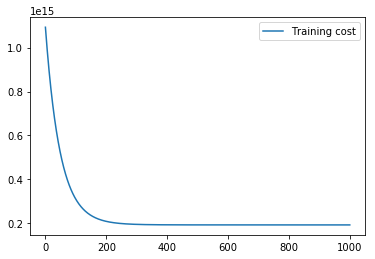

The final hypothesis result is price = 155588.32254716998 * sqft_above + 21724.4750655585 * bedrooms + 507340.5886982554


In [658]:
def run():
    train_data, validation_data = prepare_and_split_data(housing_data)
    m, b = train(train_data)
    result = get_validation_result(m, b, validation_data)
        
run()